In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR
import warnings
warnings.filterwarnings("ignore")
filename = 'data/bankloan.xls'
data = pd.read_excel(filename)
x = data.iloc[:,:8].as_matrix()
y = data.iloc[:,8].as_matrix()
rlr = RLR()
rlr.fit(x, y)
rlr.get_support()
print(u'通过随机逻辑回归模型筛选特征结束。')
columns = data.columns[:8]
print(u'有效特征为：%s' % ','.join(columns[rlr.get_support()]))
x = data[columns[rlr.get_support()]].as_matrix()
lr = LR()
lr.fit(x, y)
print(u'逻辑回归模型训练结束。')
print(u'模型的平均正确率为：%s' % lr.score(x, y))

通过随机逻辑回归模型筛选特征结束。
有效特征为：工龄,地址,负债率,信用卡负债
逻辑回归模型训练结束。
模型的平均正确率为：0.8142857142857143


In [2]:
# -*- coding: utf-8 -*-
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
filename = 'data/sales_data.xls'
data = pd.read_excel(filename, index_col=u'序号')
columns = list(data.columns)[:3]
data[data==u'好'] = 1
data[data==u'是'] = 1
data[data==u'高'] = 1
data[data!=1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)
dtc = DTC(criterion='entropy')
dtc.fit(x, y)
x = pd.DataFrame(x)
x.columns = ['weather', 'is weekend', 'is sale']
with open('tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=x.columns, out_file=f)

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras as k
import numpy as np
filename = 'data/sales_data.xls'
data = pd.read_excel(filename, index_col=u'序号')
data[data==u'好'] = 1
data[data==u'是'] = 1
data[data==u'高'] = 1
data[data!=1] = 0
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)
y1 = k.utils.to_categorical(y, 2)
model = Sequential()
model.add(Dense(3))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='binary')
model.fit(x, y1, epochs=1000, batch_size=10)
yp = model.predict_classes(x).reshape(len(y))

Using TensorFlow backend.


Epoch 1/1000
34/34 [==============================] - 0s 9ms/step - loss: 0.6802
Epoch 2/1000
34/34 [==============================] - 0s 353us/step - loss: 0.6787
Epoch 3/1000
34/34 [==============================] - 0s 265us/step - loss: 0.6773
Epoch 4/1000
34/34 [==============================] - 0s 353us/step - loss: 0.6765
Epoch 5/1000
34/34 [==============================] - 0s 353us/step - loss: 0.6753
Epoch 6/1000
34/34 [==============================] - 0s 324us/step - loss: 0.6745
Epoch 7/1000
34/34 [==============================] - 0s 324us/step - loss: 0.6738
Epoch 8/1000
34/34 [==============================] - 0s 265us/step - loss: 0.6729
Epoch 9/1000
34/34 [==============================] - 0s 294us/step - loss: 0.6717
Epoch 10/1000
34/34 [==============================] - 0s 353us/step - loss: 0.6710
Epoch 11/1000
34/34 [==============================] - 0s 353us/step - loss: 0.6704
Epoch 12/1000
34/34 [==============================] - 0s 324us/step - loss: 0.6695
Epo

34/34 [==============================] - 0s 235us/step - loss: 0.6069
Epoch 99/1000
34/34 [==============================] - 0s 206us/step - loss: 0.6061
Epoch 100/1000
34/34 [==============================] - 0s 294us/step - loss: 0.6054
Epoch 101/1000
34/34 [==============================] - 0s 294us/step - loss: 0.6044
Epoch 102/1000
34/34 [==============================] - 0s 235us/step - loss: 0.6038
Epoch 103/1000
34/34 [==============================] - 0s 265us/step - loss: 0.6030
Epoch 104/1000
34/34 [==============================] - 0s 294us/step - loss: 0.6023
Epoch 105/1000
34/34 [==============================] - 0s 265us/step - loss: 0.6018
Epoch 106/1000
34/34 [==============================] - 0s 294us/step - loss: 0.6008
Epoch 107/1000
34/34 [==============================] - 0s 235us/step - loss: 0.6003
Epoch 108/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5997
Epoch 109/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5

34/34 [==============================] - 0s 294us/step - loss: 0.5494
Epoch 195/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5490
Epoch 196/1000
34/34 [==============================] - 0s 412us/step - loss: 0.5493
Epoch 197/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5485
Epoch 198/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5479
Epoch 199/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5477
Epoch 200/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5472
Epoch 201/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5468
Epoch 202/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5463
Epoch 203/1000
34/34 [==============================] - 0s 235us/step - loss: 0.5458
Epoch 204/1000
34/34 [==============================] - 0s 235us/step - loss: 0.5451
Epoch 205/1000
34/34 [==============================] - 0s 265us/step - loss: 0.

34/34 [==============================] - 0s 353us/step - loss: 0.5136
Epoch 291/1000
34/34 [==============================] - 0s 353us/step - loss: 0.5132
Epoch 292/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5130
Epoch 293/1000
34/34 [==============================] - 0s 383us/step - loss: 0.5131
Epoch 294/1000
34/34 [==============================] - 0s 324us/step - loss: 0.5123
Epoch 295/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5121
Epoch 296/1000
34/34 [==============================] - 0s 235us/step - loss: 0.5117
Epoch 297/1000
34/34 [==============================] - 0s 294us/step - loss: 0.5114
Epoch 298/1000
34/34 [==============================] - 0s 324us/step - loss: 0.5114
Epoch 299/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5107
Epoch 300/1000
34/34 [==============================] - 0s 265us/step - loss: 0.5105
Epoch 301/1000
34/34 [==============================] - 0s 324us/step - loss: 0.

34/34 [==============================] - 0s 265us/step - loss: 0.4901
Epoch 387/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4899
Epoch 388/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4907
Epoch 389/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4897
Epoch 390/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4893
Epoch 391/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4894
Epoch 392/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4896
Epoch 393/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4890
Epoch 394/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4889
Epoch 395/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4889
Epoch 396/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4886
Epoch 397/1000
34/34 [==============================] - 0s 265us/step - loss: 0.

34/34 [==============================] - 0s 265us/step - loss: 0.4771
Epoch 483/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4770
Epoch 484/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4770
Epoch 485/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4767
Epoch 486/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4767
Epoch 487/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4771
Epoch 488/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4765
Epoch 489/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4765
Epoch 490/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4772
Epoch 491/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.4766
Epoch 492/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4763
Epoch 493/1000
34/34 [==============================] - 0s 265us/step - loss: 0.47

34/34 [==============================] - 0s 265us/step - loss: 0.4713
Epoch 579/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4711
Epoch 580/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4713
Epoch 581/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4710
Epoch 582/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4714
Epoch 583/1000
34/34 [==============================] - 0s 383us/step - loss: 0.4708
Epoch 584/1000
34/34 [==============================] - 0s 383us/step - loss: 0.4709
Epoch 585/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4707
Epoch 586/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4706
Epoch 587/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4709
Epoch 588/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4704
Epoch 589/1000
34/34 [==============================] - 0s 265us/step - loss: 0.

34/34 [==============================] - 0s 265us/step - loss: 0.4693
Epoch 675/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4682
Epoch 676/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4684
Epoch 677/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4681
Epoch 678/1000
34/34 [==============================] - 0s 353us/step - loss: 0.4679
Epoch 679/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4681
Epoch 680/1000
34/34 [==============================] - 0s 383us/step - loss: 0.4680
Epoch 681/1000
34/34 [==============================] - 0s 412us/step - loss: 0.4679
Epoch 682/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4678
Epoch 683/1000
34/34 [==============================] - 0s 383us/step - loss: 0.4683
Epoch 684/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4678
Epoch 685/1000
34/34 [==============================] - 0s 324us/step - loss: 0.

34/34 [==============================] - 0s 294us/step - loss: 0.4679
Epoch 771/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4676
Epoch 772/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4675
Epoch 773/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4675
Epoch 774/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4675
Epoch 775/1000
34/34 [==============================] - 0s 206us/step - loss: 0.4676
Epoch 776/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4674
Epoch 777/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4675
Epoch 778/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4673
Epoch 779/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4673
Epoch 780/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4675
Epoch 781/1000
34/34 [==============================] - 0s 294us/step - loss: 0.

34/34 [==============================] - 0s 324us/step - loss: 0.4659
Epoch 867/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4660
Epoch 868/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4664
Epoch 869/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4663
Epoch 870/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4664
Epoch 871/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4660
Epoch 872/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4660
Epoch 873/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4661
Epoch 874/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4660
Epoch 875/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4666
Epoch 876/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4664
Epoch 877/1000
34/34 [==============================] - 0s 324us/step - loss: 0.

34/34 [==============================] - 0s 265us/step - loss: 0.4659
Epoch 963/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4661
Epoch 964/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4660
Epoch 965/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4660
Epoch 966/1000
34/34 [==============================] - 0s 206us/step - loss: 0.4666
Epoch 967/1000
34/34 [==============================] - 0s 324us/step - loss: 0.4659
Epoch 968/1000
34/34 [==============================] - 0s 294us/step - loss: 0.4665
Epoch 969/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4666
Epoch 970/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4665
Epoch 971/1000
34/34 [==============================] - 0s 235us/step - loss: 0.4661
Epoch 972/1000
34/34 [==============================] - 0s 265us/step - loss: 0.4659
Epoch 973/1000
34/34 [==============================] - 0s 353us/step - loss: 0.

In [4]:
def cm_plot(y, yp):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, yp)
    import matplotlib.pyplot as plt
    plt.matshow(cm, cmap=plt.cm.Greens)
    plt.colorbar()
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    return plt
cm_plot(y, yp).show()

In [5]:
from sklearn.cluster import KMeans
inputfile = 'data/consumption_data.xls'
outputfile = 'result/data_type.xls'
k = 3
iteration = 500
data = pd.read_excel(inputfile, index_col='Id')
data_zs = 1.0*(data-data.mean())/data.std()
model = KMeans(n_clusters=k, n_jobs=4, max_iter=iteration)
model.fit(data_zs)
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns)+[u'类别数目']
print(r)

          R         F         M  类别数目
0 -0.149353 -0.658893 -0.271780   559
1 -0.160451  1.114802  0.392844   341
2  3.455055 -0.295654  0.449123    40


In [6]:
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns)+[u'聚类类别']
r.to_excel(outputfile)

In [26]:
def density_plot(data, title):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    for i in range(len(data.iloc[0])):
        plt.figure()
        (data.iloc[:,i]).plot(kind='kde', label=data.columns[i], linewidth=2)
        plt.ylabel(u'密度')
        plt.xlabel(u'人数')
        plt.title(u'聚类类别%s各属性的密度曲线' % title)
        plt.legend()
        plt.show()

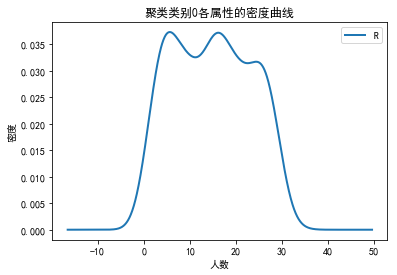

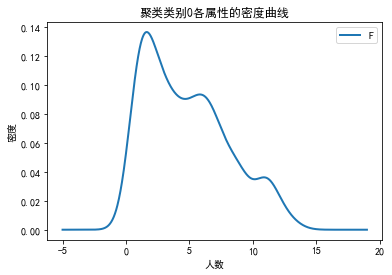

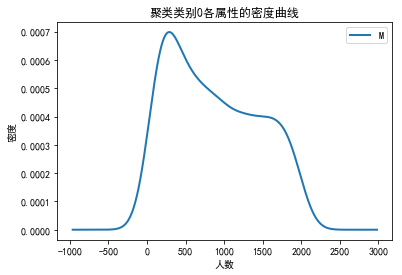

In [27]:
density_plot(data[r[u'聚类类别']==0], 0)

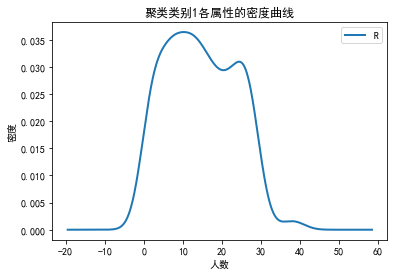

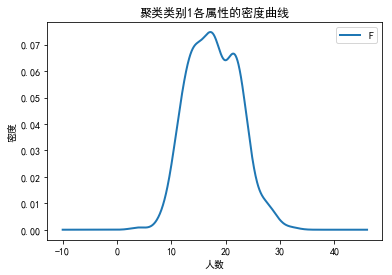

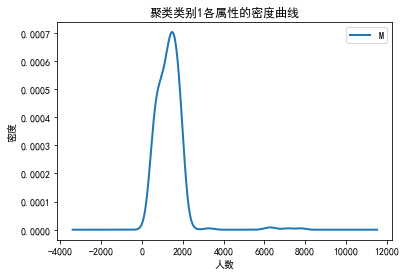

In [28]:
density_plot(data[r[u'聚类类别']==1], 1)

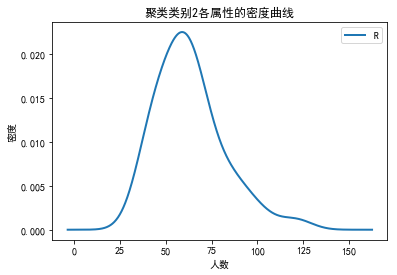

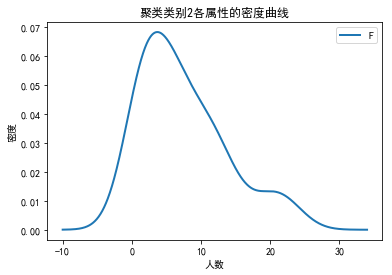

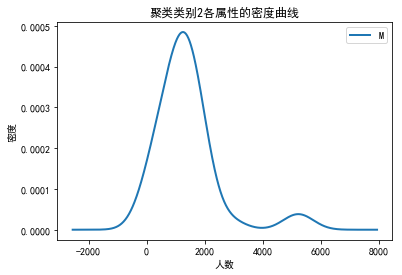

In [29]:
density_plot(data[r[u'聚类类别']==2], 2)

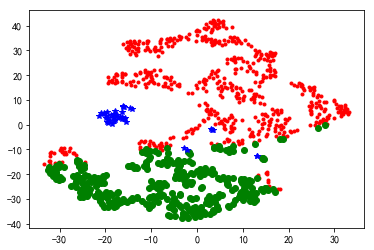

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
tsne = TSNE()
tsne.fit_transform(data_zs)
tsne = pd.DataFrame(tsne.embedding_, index=data_zs.index)
d = tsne[r[u'聚类类别']==0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别']==1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别']==2]
plt.plot(d[0], d[1], 'b*')
plt.show()

In [34]:
def connect_string(x, ms):
    x = list(map(lambda i:sorted(i.split(ms)), x))
    l = len(x[0])
    r = []
    for i in range(len(x)):
        for j in range(i,len(x)):
            if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
                r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
    return r
def find_rule(d, support, confidence, ms=u'--'):
    result = pd.DataFrame(index=['support', 'confidence'])
    support_series = 1.0*d.sum()/len(d)
    column = list(support_series[support_series>support].index)
    k = 0
    while len(column)>1:
        k = k+1
        print(u'\n正在进行第%s次搜索...' % k)
        column = connect_string(column, ms)
        print(u'数目：%s...' % len(column))
        sf = lambda i: d[i].prod(axis=1, numeric_only=True)
        d_2 = pd.DataFrame(list(map(sf, column)), index=[ms.join(i) for i in column]).T
        support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d)
        column = list(support_series_2[support_series_2 > support].index)
        support_series = support_series.append(support_series_2)
        column2 = []
        for i in column: 
            i = i.split(ms)
            for j in range(len(i)):
                column2.append(i[:j]+i[j+1:]+i[j:j+1])
        cofidence_series = pd.Series(index=[ms.join(i) for i in column2])
        for i in column2:
            cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]
        for i in cofidence_series[cofidence_series > confidence].index:
            result[i] = 0.0
            result[i]['confidence'] = cofidence_series[i]
            result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]
    result = result.T.sort_values(['confidence','support'], ascending = False)
    print(u'\n结果为：')
    print(result)
    return result

In [35]:
inputfile = 'data/menu_orders.xls'
outputfile = 'result/apriori_rules.xls'
data = pd.read_excel(inputfile, header=None)
print(u'\n转换原始数据至0-1矩阵...')
ct = lambda x: pd.Series(1, index=x[pd.notnull(x)])
b = map(ct, data.as_matrix())
data = pd.DataFrame(list(b)).fillna(0)
print(u'\n转换完毕。')
del b
support = 0.2
confidence = 0.5
ms = '---'
find_rule(data, support, confidence, ms).to_excel(outputfile)


转换原始数据至0-1矩阵...

转换完毕。

正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
c---a          0.5    0.714286
a---c          0.5    0.714286
a---b          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
a---c---e      0.3    0.600000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c      0.3    0.600000


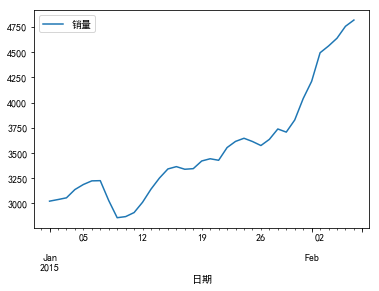

In [36]:
discfile = 'data/arima_data.xls'
forecasnum = 5
data = pd.read_excel(discfile, index_col=u'日期')
data.plot()
plt.show()

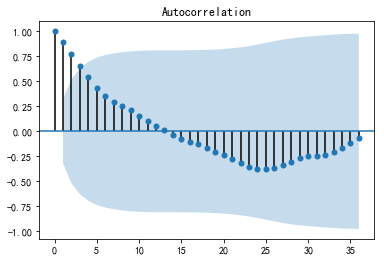

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [38]:
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'销量']))

原始序列的ADF检验结果为： (1.8137710150945274, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


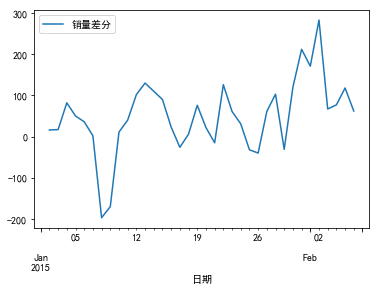

In [39]:
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data.plot()

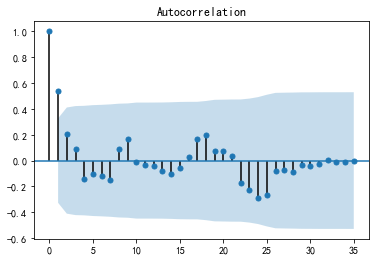

In [40]:
plot_acf(D_data).show()

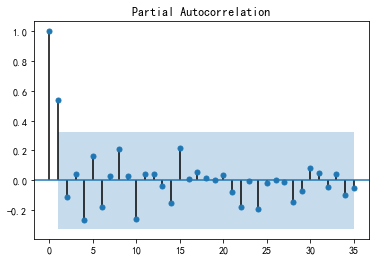

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()

In [42]:
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'销量差分']))

差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1))

差分序列的白噪声检验结果为： (array([11.30402222]), array([0.00077339]))


In [56]:
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_data)/10)
qmax = int(len(D_data)/10)
bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(D_data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix)

In [57]:
bic_matrix

,0,1,2,3
0,418.262810,420.442367,414.794192,418.087835
1,421.068758,NaN,NaN,NaN
2,422.476769,NaN,420.028968,NaN
3,425.942544,426.880891,423.574047,NaN


In [58]:
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值为：%s、%s' % (p,q))

BIC最小的p值和q值为：0、2


In [61]:
model = ARIMA(D_data, (p,1,q)).fit()

In [62]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 414.7942  
Dependent Variable: D.销量差分           Log-Likelihood:      -200.29   
Date:               2019-05-28 16:47 Scale:               1.0000    
No. Observations:   35               Method:              css-mle   
Df Model:           3                Sample:              01-03-2015
Df Residuals:       32                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 70.717    
AIC:                408.5728         HQIC:                410.720   
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             3.4034    1.7980   1.8928  0.0675  -0.1207   6.9275
ma.L1.D.销量差分     -0.3636    0.1963  -1.8523  0.0732  -0.7483   0.0211
ma.L2.D.销量差分     -0.6364    0.1868  -3.4072  0.0018  -1.0025  -0.2703
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1            1.0000             0.0000           1.0000             0.0000
MA.2           -1.5713             0.0000           1.5713             0.5000
====================================================================

"""

In [63]:
model.forecast(5)

(array([ 94.31970661, 118.12565122, 121.52905122, 124.93245122,
        128.33585122]),
 array([70.71697999, 83.82307415, 83.82307415, 83.82307415, 83.82307415]),
 array([[-44.28302726, 232.92244047],
        [-46.16455518, 282.41585762],
        [-42.76115518, 285.81925762],
        [-39.35775518, 289.22265762],
        [-35.95435518, 292.62605762]]))

In [64]:
from sklearn.cluster import KMeans
inputfile = 'data/consumption_data.xls'
k = 3
threshold = 2
iteration = 500
data = pd.read_excel(inputfile, index_col='Id')
data_zs = 1.0*(data-data.mean())/data.std()
model = KMeans(n_clusters=k, n_jobs=4, max_iter=iteration)
model.fit(data_zs)
r = pd.concat([data_zs, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns)+[u'聚类类别']
norm = []
for i in range(k):
    norm_tmp = r[['R', 'F', 'M']][r[u'聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis=1)
    norm.append(norm_tmp/norm_tmp.median())
norm = pd.concat(norm)

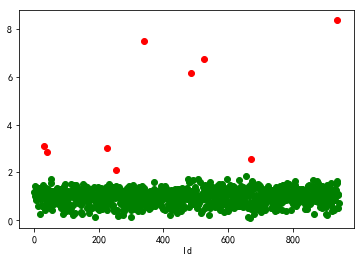

In [66]:
norm[norm<=threshold].plot(style='go')
discrete_points = norm[norm>threshold]
discrete_points.plot(style='ro')

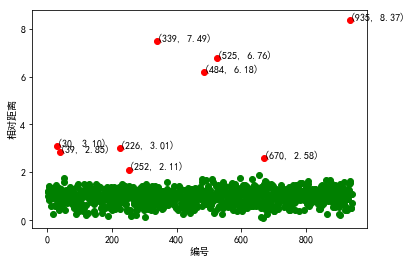

In [68]:
norm[norm<=threshold].plot(style='go')
discrete_points = norm[norm>threshold]
discrete_points.plot(style='ro')
for i in range(len(discrete_points)):
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)' % (id, n), xy=(id, n), xytext=(id, n))
    plt.xlabel(u'编号')
    plt.ylabel(u'相对距离')